## Домашнее задание

1. Загрузить выборку car.csv.
2. Провести анализ полученной выборки используя метрики описательной статистики.
3. Проверить баланс выборки (вывести график).
4. Проовести андерсэмплинг.
5. Провести оверсемплинг.
6. Сравнить полученные результаты.



## Простой случайный сэмплинг

Допустим, если вы хотите сделать выборку, где каждый элемент имеет равную вероятность быть выбранным.
Ниже мы выбираем 100 таких элементов из датасета.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dtypes = {'Make': str, 'Model': str, 'Year' : 'Int64', 'Engine Fuel Type': str, 'Engine HP' : 'Int64',
#        'Engine Cylinders' : 'Int64', 'Transmission Type' : str, 'Driven_Wheels' : str,
#        'Number of Doors' : 'Int64', 'Market Category' :str, 'Vehicle Size':str, 'Vehicle Style':str,
#        'highway MPG':'Int64', 'city mpg':'Int64', 'Popularity':'Int64', 'MSRP':'Int64'
#          }

In [3]:
data=pd.read_csv('../dataset/car.csv', delimiter=',').dropna().drop(['Market Category'], axis=1)

category2 = 'MSRP'

X=data.iloc[:,:]
meanPrice=data[category2].mean()
print(data[category2].min())
print(data[category2].max())
print(data[category2].mean())
print(data[category2].median())

2000
2065902
50072.66947055913
35005.0


In [4]:
data[category2] = data[category2].apply(lambda x: 1 if x > meanPrice else 0)
data[category2]

0        0
1        0
2        0
3        0
4        0
        ..
11909    0
11910    1
11911    1
11912    1
11913    0
Name: MSRP, Length: 8084, dtype: int64

In [5]:
count_1 = data[category2][(data[category2] == 1)].value_counts()
count_0 = data[category2][(data[category2] == 0)].value_counts()
print(count_1)
print(count_0)

1    1899
Name: MSRP, dtype: int64
0    6185
Name: MSRP, dtype: int64


In [6]:
# Определение категорий
y = data[category2]
X

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,0
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,1
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,1
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,1


In [7]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11909    0
11910    1
11911    1
11912    1
11913    0
Name: MSRP, Length: 8084, dtype: int64

In [8]:
def stat(data, category):
    target_count = data[category].value_counts(dropna=True)
    print(target_count)
    target_count = data[category].value_counts(normalize=True, dropna=True)
    print(target_count)
    sns.countplot(x=category, data=data)
    plt.box(False)
    plt.xlabel('Outcome 1/0',fontsize=11)
    plt.ylabel('Количество наблюдений',fontsize=11)
    plt.show()

In [9]:
sample_df = data.sample(100)
sample_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
2890,Bentley,Continental Supersports,2012,flex-fuel (premium unleaded required/E85),621.0,12.0,AUTOMATIC,all wheel drive,2.0,Midsize,Coupe,19,12,520,1
3783,Mitsubishi,Eclipse,2011,regular unleaded,162.0,4.0,AUTOMATIC,front wheel drive,2.0,Compact,2dr Hatchback,28,20,436,0
6422,Acura,Legend,1994,regular unleaded,230.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,16,204,0
5083,Infiniti,G Coupe,2011,premium unleaded (recommended),330.0,6.0,MANUAL,rear wheel drive,2.0,Midsize,Coupe,25,17,190,0
8937,Volvo,S80,2014,regular unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,25,18,870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,Volvo,S40,2010,premium unleaded (recommended),227.0,5.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,30,21,870,0
2823,Plymouth,Colt,1992,regular unleaded,92.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,33,27,535,0
11570,Volvo,XC60,2015,regular unleaded,240.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,25,18,870,0
10116,Suzuki,Swift,2001,regular unleaded,79.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,38,31,481,0


0    71
1    29
Name: MSRP, dtype: int64
0    0.71
1    0.29
Name: MSRP, dtype: float64


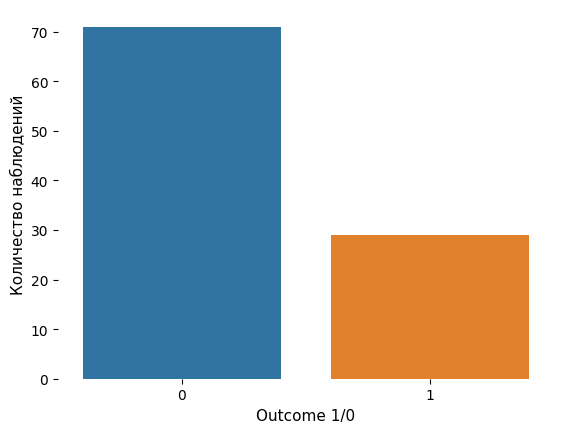

In [10]:
stat(sample_df, category2)

Стратифицированный сэмплинг

Стратифицированный сэмплинг (Stratified sampling). Стратификация — это процесс разделения исходной совокупности на несколько однородных групп (страт) перед процедурой сэмплинга. Тогда стратифицированным называется метод сэмплинга, при котором объекты из каждой страты извлекаются независимо.

Страты должны быть исчерпывающими (т.е. любой объект принадлежит какой-либо страте) и взаимоисключающими (каждый объект может принадлежат к одной и только одной страте). К каждой страте применяется процедура простого случайного сэмплинга.

Использование стратифицированного сэмплинга позволяет снизить ошибку выборки. Т.е. ошибку, которая возникает из-за того, что анализ производится не на основе всей совокупности, а только на основе выборки.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# Создание объекта StratifiedShuffleSplit и задание количества итераций
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Генерация индексов для разделения на обучающую и тестовую выборки
train_index, test_index = next(stratified_split.split(X, y, y))

# Создание стратифицированных обучающей и тестовой выборок
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [12]:
print(X_train.shape)
X_train.iloc[:5,:]

(6467, 15)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11617,Volvo,XC70,2016,regular unleaded,250.0,5.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,26,19,870,0
82,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,36,23,1013,0
3670,Mercedes-Benz,E-Class,2015,premium unleaded (required),302.0,6.0,AUTOMATIC,rear wheel drive,4.0,Midsize,Sedan,29,24,617,1
7540,Nissan,Pathfinder,2017,regular unleaded,284.0,6.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,26,19,2009,0
6012,Volkswagen,Jetta GLI,2013,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,32,24,873,0


In [13]:
print(X_test.shape)
X_test.iloc[:5,:]

(1617, 15)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4853,Subaru,Forester,2017,regular unleaded,170.0,4.0,MANUAL,all wheel drive,4.0,Midsize,4dr SUV,28,22,640,0
1081,Audi,A4,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,all wheel drive,4.0,Midsize,Sedan,31,24,3105,0
9782,Chevrolet,Sonic,2016,regular unleaded,138.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,35,24,1385,0
10817,Mazda,Tribute,2010,regular unleaded,171.0,4.0,MANUAL,front wheel drive,4.0,Compact,4dr SUV,28,22,586,0
4446,Chevrolet,Express,2016,flex-fuel (unleaded/E85),285.0,8.0,AUTOMATIC,rear wheel drive,3.0,Large,Passenger Van,16,11,1385,0


In [14]:
print(y_train.shape)
y_train.iloc[:5]

(6467,)


11617    0
82       0
3670     1
7540     0
6012     0
Name: MSRP, dtype: int64

In [15]:
print(y_test.shape)
y_test.iloc[:5]

(1617,)


4853     0
1081     0
9782     0
10817    0
4446     0
Name: MSRP, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
X_train

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
3809,Ford,Edge,2017,premium unleaded (recommended),245.0,4.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,27,20,5657,0
7595,Honda,Pilot,2015,regular unleaded,250.0,6.0,AUTOMATIC,four wheel drive,4.0,Midsize,4dr SUV,24,17,2202,0
2922,Toyota,Corolla iM,2017,regular unleaded,137.0,4.0,MANUAL,front wheel drive,4.0,Compact,4dr Hatchback,35,27,2031,0
6709,Lincoln,Mark VII,1991,regular unleaded,225.0,8.0,AUTOMATIC,rear wheel drive,2.0,Large,Coupe,22,15,61,0
8913,Audi,S6,2015,premium unleaded (required),420.0,8.0,AUTOMATED_MANUAL,all wheel drive,4.0,Midsize,Sedan,27,17,3105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,Chevrolet,Uplander,2007,regular unleaded,240.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Passenger Minivan,23,16,1385,0
10731,Ford,Transit Wagon,2017,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Large,Passenger Van,19,14,5657,0
777,Volvo,850,1995,regular unleaded,222.0,5.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,24,17,870,0
11134,Volvo,V60,2016,regular unleaded,325.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,27,18,870,0


## Случайный андерсэмплинг и оверсэмплинг

Слишком часто в жизни встречаются несбалансированные наборы данных.

Широко применяемый в таком случае способ называется ресэмплинг (в русском переводе иногда говорят «передискретизация» — прим. перев.). Его суть заключается либо в удалении элементов из слишком большого набора (андерсэмплинг) и/или добавлении большего количества элементов в недостаточно большой набор (оверсэмплинг).

0    6185
1    1899
Name: MSRP, dtype: int64
0    0.765092
1    0.234908
Name: MSRP, dtype: float64


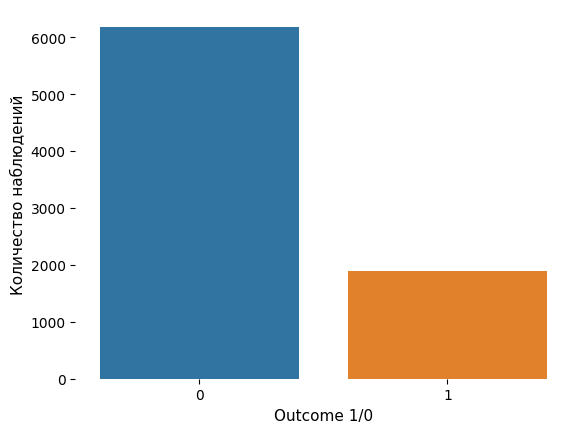

In [17]:
stat(data, category2)

[pandas.DataFrame.sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)

In [18]:
from imblearn.under_sampling import RandomUnderSampler
# Применение андерсэмплинга
X_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_resample(X, y)
X_resampled

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10523,Pontiac,Torrent,2009,regular unleaded,185.0,6.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,24,17,210,0
7665,Toyota,Prius c,2014,regular unleaded,99.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,4dr Hatchback,46,53,2031,0
9975,Cadillac,SRX,2016,regular unleaded,308.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,23,16,1624,0
10884,Acura,TSX,2013,premium unleaded (recommended),201.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,31,22,204,0
9255,GMC,Sierra 1500 Classic,2007,flex-fuel (unleaded/E85),295.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,Extended Cab Pickup,17,13,549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,1
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,1
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,1
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,1


0    1899
1    1899
Name: MSRP, dtype: int64
0    0.5
1    0.5
Name: MSRP, dtype: float64


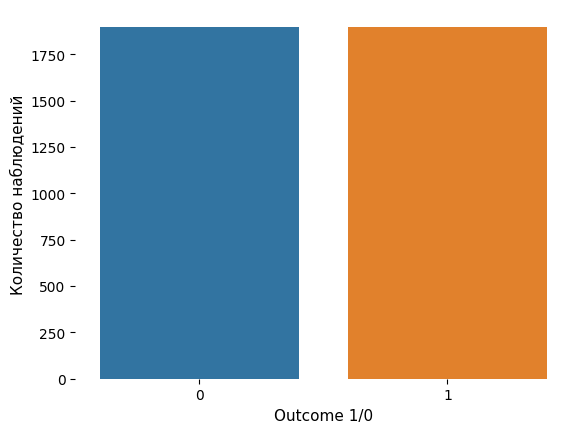

In [19]:
stat(X_resampled, category2)

In [20]:
from imblearn.over_sampling import RandomOverSampler
# Применение оверсэмплинга
X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X, y)
X_resampled

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12365,Audi,R8,2015,premium unleaded (required),525.0,10.0,MANUAL,all wheel drive,2.0,Compact,Coupe,19,12,3105,1
12366,BMW,6 Series,2017,premium unleaded (required),315.0,6.0,AUTOMATIC,all wheel drive,2.0,Midsize,Coupe,28,19,3916,1
12367,Mercedes-Benz,SLK-Class,2016,premium unleaded (required),416.0,8.0,AUTOMATIC,rear wheel drive,2.0,Compact,Convertible,28,19,617,1
12368,Mercedes-Benz,SLK-Class,2016,premium unleaded (required),302.0,6.0,AUTOMATIC,rear wheel drive,2.0,Compact,Convertible,29,21,617,1


0    6185
1    6185
Name: MSRP, dtype: int64
0    0.5
1    0.5
Name: MSRP, dtype: float64


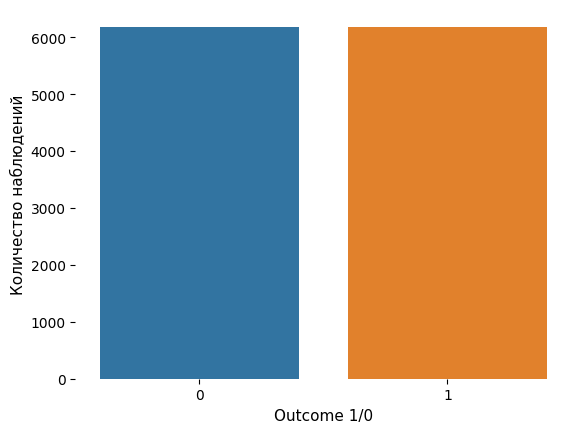

In [21]:
stat(X_resampled, category2)

In [22]:
data.iloc[:,:].select_dtypes(exclude=['object', 'category'])

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,0
1,2011,300.0,6.0,2.0,28,19,3916,0
2,2011,300.0,6.0,2.0,28,20,3916,0
3,2011,230.0,6.0,2.0,28,18,3916,0
4,2011,230.0,6.0,2.0,28,18,3916,0
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,0
11910,2012,300.0,6.0,4.0,23,16,204,1
11911,2012,300.0,6.0,4.0,23,16,204,1
11912,2013,300.0,6.0,4.0,23,16,204,1


## Андерсэмплинг с использованием Tomek Links:

Один из предоставляемых методов называется «Tomek Links». «Links» в данном случае — пары элементов из разных классов, находящиеся поблизости.



(8060, 8)
(8084, 8)
(8060, 9)
0    6161
1    1899
Name: MSRP, dtype: int64
0    0.764392
1    0.235608
Name: MSRP, dtype: float64


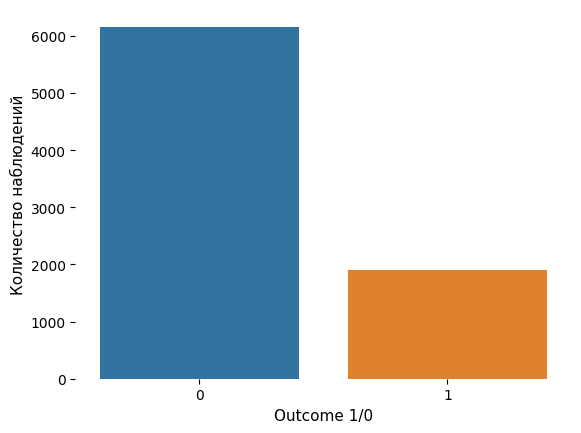

In [23]:
from imblearn.under_sampling import TomekLinks

X=data.iloc[:,:].select_dtypes(exclude=['object', 'category'])

tl = TomekLinks()
y = X[category2]
X_res, y_res = tl.fit_resample(X, y)
print(X_res.shape)
print(X.shape)
df_new=pd.concat([X_res, y_res], axis=1)
print(df_new.shape)
stat(X_res, category2)

## Оверсэмплинг:

В SMOTE (Способ Передискретизации Синтезированных Меньшинств) мы создаём элементы в непосредственной близости от уже существующих в меньшем наборе.


(12370, 8)
(8084, 8)
0    6185
1    6185
Name: MSRP, dtype: int64
0    0.5
1    0.5
Name: MSRP, dtype: float64


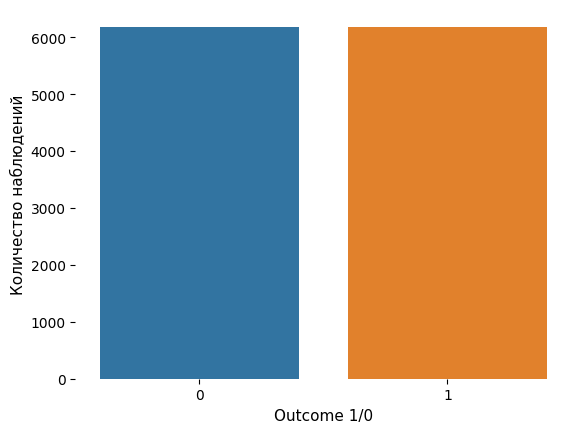

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape
stat(X_sm,category2)